# Pandas and SciPy

This notebook will introduce two important and widely used modules, namely *Pandas*, which basically implements the data frames known from R and *SciPy* (mainly used due to the wide variety of statistical distributions)

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

In [2]:
print(pd.__version__)

0.24.1


## Pandas

Pandas ([link](https://pandas.pydata.org/)) is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Since most of you are experienced R-users, getting to know Pandas is quite easy. Pandas bridges the gap between R and Python for data analysis. If you want to learn more about Pandas, there are many online resources you can check out, see [https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

We use the dataset *obk.long* to illustrate how Pandas works.

In [3]:
src = 'data/obk_long.csv'
df = pd.read_csv(src)

"*This is the long version of the OBrienKaiser dataset from the car pakage adding a random covariate age. Originally the dataset ist taken from O'Brien and Kaiser (1985). The description from OBrienKaiser says: "These contrived repeated-measures data are taken from O'Brien and Kaiser (1985). The data are from an imaginary study in which 16 female and male subjects, who are divided into three treatments, are measured at a pretest, postest, and a follow-up session; during each session, they are measured at five occasions at intervals of one hour. The design, therefore, has two between-subject and two within-subject factors.*"

In [4]:
df.head()

,id,treatment,gender,age,phase,hour,value
0,1,control,M,-4.75,pre,1,1
1,1,control,M,-4.75,pre,2,2
2,1,control,M,-4.75,pre,3,4
3,1,control,M,-4.75,pre,4,2
4,1,control,M,-4.75,pre,5,1


Get some info about the columns

In [5]:
df.dtypes

id             int64
treatment     object
gender        object
age          float64
phase         object
hour           int64
value          int64
dtype: object

### Indexing

See how columns and rows can be indexed.

#### Columns

In [6]:
# by name
df['treatment'].head()
# alternatively:
# df.treatment.head()

0    control
1    control
2    control
3    control
4    control
Name: treatment, dtype: object

In [7]:
# by index
df.iloc[:,4].head()

0    pre
1    pre
2    pre
3    pre
4    pre
Name: phase, dtype: object

In [8]:
# multiple columns by name
df[['treatment','age']].head()

,treatment,age
0,control,-4.75
1,control,-4.75
2,control,-4.75
3,control,-4.75
4,control,-4.75


In [9]:
# multiple columns by name (from - to)
df.loc[:,'age':'value'].head()

,age,phase,hour,value
0,-4.75,pre,1,1
1,-4.75,pre,2,2
2,-4.75,pre,3,4
3,-4.75,pre,4,2
4,-4.75,pre,5,1


In [10]:
# multiple columns by index
df.iloc[:,:2].head()

,id,treatment
0,1,control
1,1,control
2,1,control
3,1,control
4,1,control


#### Rows

In [11]:
df.iloc[3:6,:]

,id,treatment,gender,age,phase,hour,value
3,1,control,M,-4.75,pre,4,2
4,1,control,M,-4.75,pre,5,1
5,1,control,M,-4.75,post,1,3


In [12]:
df.loc[df.treatment=='A'].head()

,id,treatment,gender,age,phase,hour,value
75,6,A,M,7.25,pre,1,7
76,6,A,M,7.25,pre,2,8
77,6,A,M,7.25,pre,3,7
78,6,A,M,7.25,pre,4,9
79,6,A,M,7.25,pre,5,9


### Getting to know the data

We can get a better overview over the data we are dealing with using a few important functions

Are there any missing data?

In [13]:
df.isnull().sum() # apparently, we are lucky and don't have to deal with missings

id           0
treatment    0
gender       0
age          0
phase        0
hour         0
value        0
dtype: int64

get some descriptives about the columns

In [14]:
df.value.describe()

count    240.000000
mean       5.500000
std        2.290603
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: value, dtype: float64

In [15]:
df.phase.describe()

count     240
unique      3
top       pre
freq       80
Name: phase, dtype: object

In [16]:
print('Mean of value:' ,df['value'].mean())
print('Std of age:', df['age'].std())

Mean of value: 5.5
Std of age: 5.078875769252277


plot a histogram of age

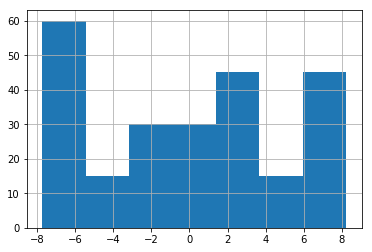

In [17]:
df.age.hist(bins=7)

how many men and women? Let's first pick only unique ids and then check value counts

In [18]:
df.drop_duplicates('id').gender.value_counts()

M    8
F    8
Name: gender, dtype: int64

### Group by

Computing descriptives grouped by one or more columns.

In [19]:
df.groupby(df.treatment).value.mean()
# alternatively
#df.groupby(['treatment'])['value'].mean()

treatment
A          6.25
B          6.00
control    4.20
Name: value, dtype: float64

In [20]:
df.groupby(df.treatment).value.agg(['mean','std','median'])

,mean,std,median
treatment,,,
A,6.25,2.467586,6
B,6.00,2.152816,6
control,4.20,1.747585,4


Compute a new column that has the same value for each id.

In [21]:
df['std'] = df.groupby(['id'])['value'].transform('std')

In [22]:
#df.groupby(df.id).value

In [23]:
df.head()

,id,treatment,gender,age,phase,hour,value,std
0,1,control,M,-4.75,pre,1,1,1.175139
1,1,control,M,-4.75,pre,2,2,1.175139
2,1,control,M,-4.75,pre,3,4,1.175139
3,1,control,M,-4.75,pre,4,2,1.175139
4,1,control,M,-4.75,pre,5,1,1.175139


Compute a new column by applying a function on an existing one. This example is nonsense but it demonstrates how this can be done.

In [24]:
df['minute'] = df['hour'] * 60

In [25]:
df['age_z'] = df['age'] / df['age'].std()
print(df.age_z.std())

0.9999999999999999


In [26]:
df.head()

,id,treatment,gender,age,phase,hour,value,std,minute,age_z
0,1,control,M,-4.75,pre,1,1,1.175139,60,-0.935246
1,1,control,M,-4.75,pre,2,2,1.175139,120,-0.935246
2,1,control,M,-4.75,pre,3,4,1.175139,180,-0.935246
3,1,control,M,-4.75,pre,4,2,1.175139,240,-0.935246
4,1,control,M,-4.75,pre,5,1,1.175139,300,-0.935246


Let's delete both columns...

In [27]:
# drop inplace so that we do not have to assign the result to df.
df.drop(['minute','age_z'],axis=1,inplace=True)

In [28]:
df.columns

Index(['id', 'treatment', 'gender', 'age', 'phase', 'hour', 'value', 'std'], dtype='object')

### <span style="color:blue">Exercise time</span>

Please import the dataset below by simply running the cell. In this dataset, you have the age (`Alter`), gender (`Geschlecht`), favorite class in school (`Lieblingsfach`), motivation (`Motivation`), experience with programming (`Erfahrung`), `Facebook` , `Instagram` , `Twitter` and several items from 3 different questionnaires (`M1:M9`, `I1:I20`, `P1:P10`) for each participant.

In [29]:
link2 = "https://www.psychologie.uni-heidelberg.de/ae/meth/team/mertens/datensatz.html"
data = pd.read_csv(link2)
# data.info()

In [30]:
#data.columns

Compute the mean age for those who use Twitter.

In [31]:
data.loc[data.Twitter=='ja'].Alter.mean()

21.25

Compute how many participants use both Facebook and Twitter. Use `group_by` and `size`.

In [32]:
data.groupby(['Facebook','Twitter']).size()

Facebook  Twitter
ja        ja          7
          nein       62
nein      ja          1
          nein       18
dtype: int64

Get the age of the oldest person grouped by column Facebook. 

In [33]:
data.groupby(['Facebook']).Alter.max()

Facebook
ja      43
nein    45
Name: Alter, dtype: int64

Compute for all participants older than 20 the median of the columns `P1:P5`. 

In [34]:
data.loc[data.Alter > 20,'P1':'P5'].median(axis=0)

P1    3.0
P2    4.0
P3    4.0
P4    3.0
P5    4.0
dtype: float64

Compute a new column named `internet_usage` that contains the row mean of columns `I1 : I20`.

In [35]:
data['internet_usage'] = data.loc[:,'I1':'I20'].mean(axis=1)

## SciPy

SciPy ([link](https://www.scipy.org/)) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. It has a lot to offer but we mainly use it due to the variety of different probability distributions it offers. For an overview of continuous distributions, take a look at this link:

[https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html)

### Specifying distributions

Before we can generate random numbers or compute the density, the distribution has to be specified.

In [36]:
normal = stats.norm(loc=3,scale=2)

We can extract several moments of the distribution directly over via `moments`. 

In [37]:
print('Mean:', normal.mean())
print('Variance:', normal.var())
print('Skewness:', normal.moment(2))

Mean: 3.0
Variance: 4.0
Skewness: 13.0


Computing the probabiliy density function is easy via `pdf`, cumulative distribution function `cdf` 

In [38]:
print('pdf:',normal.pdf(3))
print('cdf:',normal.cdf(3))

pdf: 0.19947114020071635
cdf: 0.5


Unfortunately, SciPy sometimes has a weird parameterization. Take a look at the uniform distribution below. It has parameters `loc` and `scale`. Probably `loc` stands for the minimum and `scale` for the maximum right? Let's test it:

In [39]:
uniform = stats.uniform(loc=-3, scale=3)
print(uniform.mean())

-1.5


As you see, we are wrong. The parameterization is:

min = `loc`    
max = `loc` + `scale`

In [40]:
uniform = stats.uniform(loc=-3, scale = 6)
print(uniform.mean()) # better

0.0


### Sampling from distributions

Sampling is very easy via the `rvs` method.

In [41]:
vals = normal.rvs(20000)
print(np.mean(vals), np.std(vals))

3.00678676722014 1.9973092768106753


### <span style='color:blue'>Exercise time</span>

Sample 1000 values from an Ex-Gaussian Distribution with parameters $\mu$ = -3, $\sigma$ = 1, $\lambda$ = 0.25 according to the Wikipedia parameterization:

[https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution](https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution)

Finally, plot the sampled values as a histogram using `sns.distplot`.

In [42]:
N = 1000
mu = -3
sigma = 1
lamb = 0.25

In [43]:
K = 1/(lamb * sigma)
samples = stats.exponnorm(K=K,loc=mu,scale=sigma).rvs(N)

/Users/ulf.mertens/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(-4, 6)]

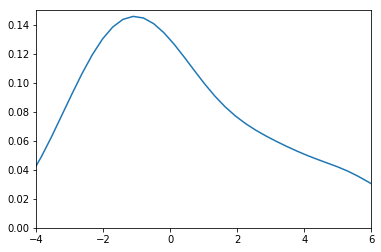

In [44]:
h = sns.distplot(samples,hist=False)
h.set(ylim=(0, 0.15))
h.set(xlim=(-4, 6))